In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [37]:
#0
day_sales = [18, 3, 8, 2, 4, 2, 8, 12, 0, 14, 2, 9, 8, 5, 15, 2, 0, 14, 4, 12, 2, 1, 6, 2, 13, 5, 5, 6, 10, 2, 3, 8, 12, 8, 10, 7, 1, 0, 14, 3, 6, 7, 3, 5, 5, 7, 20, 10, 0, 12, 0, 0, 2, 10, 6, 17, 7, 5, 7, 6, 6, 13, 14, 9, 12, 9, 25, 11, 6, 16, 12, 20, 11, 12, 15, 4, 24, 3, 13, 2, 7, 19, 1, 16, 19, 9, 4, 6, 6, 10, 11, 6, 4, 13, 9, 26, 2, 20, 20, 3, 3, 7, 7, 14, 28, 8, 9, 12, 18, 0, 16, 12, 18, 8, 17, 15, 2, 3, 19, 7, 9, 12, 22, 7, 17, 29, 10, 11, 13, 6, 7, 26, 9, 2, 19, 3]

#7
#day_sales = [7, 20, 26, 7, 32, 26, 18, 11, 22, 28, 10, 7, 14, 12, 53, 15, 12, 25, 11, 11, 17, 13, 11, 24, 13, 21, 12, 8, 23, 15, 11, 25, 20, 8, 13, 38, 31, 28, 36, 49, 60, 91, 24, 12, 12, 18, 21, 16, 13, 19, 17, 36, 18, 17, 21, 15, 24, 21, 18, 12, 21, 13, 25, 15, 13, 16, 19, 13, 15, 25, 20, 13, 17, 9, 14, 8, 27, 10, 13, 22, 25, 10, 26, 17, 20, 11, 10, 11, 12, 12, 23, 26, 12, 20, 12, 8, 14, 5, 18, 21, 13, 17, 12, 29, 22, 10, 17, 19, 12, 22, 4, 19, 10, 13, 14, 24, 25, 13, 16, 8, 14, 22, 18, 20, 21, 22, 19, 20, 16, 17, 26, 10, 23, 12, 18, 30]

#17
#day_sales= [1, 0, 0, 0, 0, 0, 11, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 3, 0, 0, 2, 1, 1, 1, 2, 1, 3, 0, 2, 1, 9, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 3, 1, 4, 1, 1, 1, 0, 2, 3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 3, 2, 1, 1, 0, 3, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 1, 0, 1, 1, 1, 2, 0, 0, 3, 3, 1, 1, 4, 0, 1, 1]

# day = list(np.arange(len(day_sales))+1)

data = pd.DataFrame({'index': pd.date_range('2021-10-01', '2022-02-13',freq='D'),'raw': day_sales}) #Each list would be added as a row
data = data.set_index('index')

data.head()

,raw
index,
2021-10-01,18
2021-10-02,3
2021-10-03,8
2021-10-04,2
2021-10-05,4


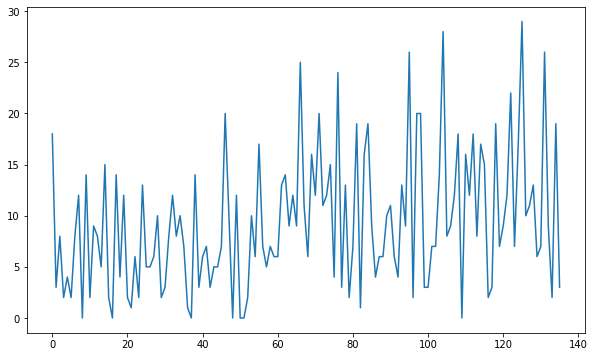

In [38]:
plt.figure(figsize=(10,6))
plt.plot(data['raw'].values)

In [39]:
import luminaire
from luminaire.model.window_density import WindowDensityHyperParams, WindowDensityModel
from luminaire.exploration.data_exploration import DataExploration

# Without log transformation: is_log_transformed = False (Default)
config = WindowDensityHyperParams().params
de = DataExploration(freq='D',
                     data_shift_truncate=True,
                     is_log_transformed=False,
                     change_point_threshold=0.5,
                     fill_rate=0.1                     
                    )
print(type(de))       
#Here the time series is daily, so I specify “freq=’D’”. 
#The fill_rate is the minimum proportion of data availability in the recent data window, a fraction between 0 and 1. I just input 0.1.

data2, profile_summary = de.profile(df=data)  
# the model only accepts a time series with the column name 'raw'
print(type(data2))

#The specification also detects the start date and the end date of the time series. 
#I did ask it to do logarithmic transformation. So “is_log_transformed” shows False. 
#Nor I input any minimum mean value for the time series, so “min_ts_mean” shows None. 

<class 'luminaire.exploration.data_exploration.DataExploration'>
<class 'pandas.core.frame.DataFrame'>


In [40]:
print(data.shape)
print(profile_summary)
data2

(136, 1)
{'success': True, 'trend_change_list': None, 'change_point_list': None, 'is_log_transformed': False, 'min_ts_mean': None, 'ts_start': '2021-10-01 00:00:00', 'ts_end': '2022-02-13 00:00:00'}


,raw,interpolated
2021-10-01,18,18.0
2021-10-02,3,3.0
2021-10-03,8,8.0
2021-10-04,2,2.0
2021-10-05,4,4.0
...,...,...
2022-02-09,26,26.0
2022-02-10,9,9.0
2022-02-11,2,2.0
2022-02-12,19,19.0


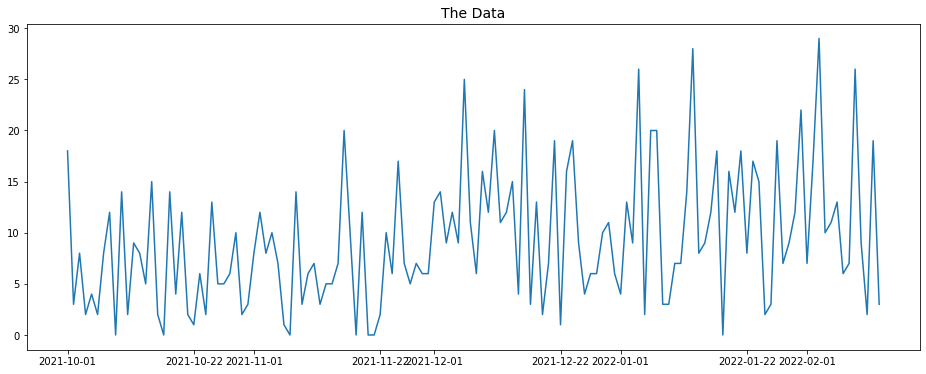

In [41]:
def change_point_plot(data, profile_summary):
    if (profile_summary['change_point_list']):
        print(profile_summary['change_point_list'])
        change_point_list = list(profile_summary['change_point_list'])
    else:
        change_point_list=[]
        
    if profile_summary['trend_change_list']:
        trend_change_list = list(profile_summary['trend_change_list'])
    else:
        trend_change_list = []

    trendline = data[data.index.isin(trend_change_list)]

    # https://stackoverflow.com/questions/47404678/valueerror-unconverted-data-remains-000000
    plt.figure(figsize=(16,6))
    plt.plot(data['raw'], linestyle = '-')
    plt.title('The Data',fontsize=14)

    #view change points
    if change_point_list != []:
        for x in change_point_list:
            #print(x,type(x))
            x1= datetime.strptime(x,'%Y-%m-%d %H:%M:%S' )
            plt.axvline(x1,lw=2, color='red')

    #view trend changes
    if trend_change_list != []:
        for x in trend_change_list:
            #print(x,type(x))
            x1= datetime.strptime(x,'%Y-%m-%d %H:%M:%S' )
            plt.axvline(x1,lw=2, color='blue')

    #trend line
    plt.plot(trendline,lw=2, linestyle='dashed', color = 'green')
    plt.show()

change_point_plot(data, profile_summary)

2. Optimal specifications

In [42]:
#Get the dataframe (data) as specified

In [43]:
from luminaire.optimization.hyperparameter_optimization import HyperparameterOptimization
op = HyperparameterOptimization(freq='D')
optimz = op.run(data=data)
print(optimz)

100%|██████████| 50/50 [01:07<00:00,  1.34s/trial, best loss: 1e+100]
{'LuminaireModel': 'LADFilteringModel', 'data_shift_truncate': 0, 'fill_rate': 0.8587589074426446, 'is_log_transformed': 1}


The Luminaire Anomaly Detection (LAD) offers two types of models: the structural model and the Kalman Filter model. 
- The structural model use a structural setting such as AR (Auto-regressive), holiday flags, or the Fourier transformation to model the data.
- The Kalman Filter model is an entire different approach as I explained in “Kalman Filter Explained!”

            raw  interpolated
2021-10-01   18      2.944439
2021-10-02    3      1.386294
2021-10-03    8      2.197225
2021-10-04    2      1.098612
2021-10-05    4      1.609438
...         ...           ...
2022-02-09   26      3.295837
2022-02-10    9      2.302585
2022-02-11    2      1.098612
2022-02-12   19      2.995732
2022-02-13    3      1.386294

[136 rows x 2 columns]


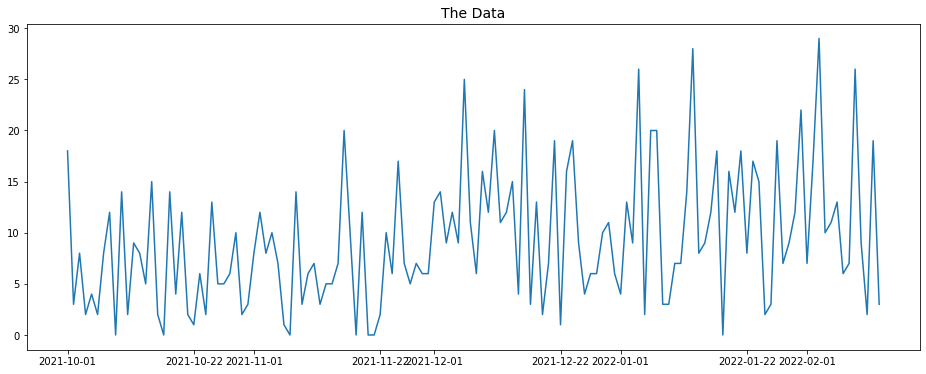

In [44]:
# Use the optimized parmater dictionary to get optimized dataexplorator object (de_optimz)
from luminaire.exploration.data_exploration import DataExploration
de_optimz = DataExploration(freq='D',change_point_threshold=0.5, **optimz)
data2, data_pre_prc = de_optimz.profile(data)
print(data2)

# view the change points of the original data
change_point_plot(data, data_pre_prc)

In [55]:
# Get the attributes of the optimal specifications for modeling
day_model_class_name = optimz['LuminaireModel']
day_module = __import__('luminaire.model', fromlist=[''])
day_model_class = getattr(day_module, day_model_class_name)
print(day_model_class)

# Let's train the model using the optimal specifications
day_model_object = day_model_class(hyper_params=optimz, freq='D')
day_success, day_model_date, day_trained_model = day_model_object.train(data=data2, **data_pre_prc)
    
print(day_success, day_model_date, day_trained_model)

# Test if the value were 2000 in 2012-6-08 an outlier or not
day_trained_model.score(30, '2022-02-23')

<class 'luminaire.model.lad_filtering.LADFilteringModel'>
True 2022-02-13 00:00:00 <luminaire.model.lad_filtering.LADFilteringModel object at 0x000001F00372B128>


({'Success': True,
  'AdjustedActual': 37.75,
  'ConfLevel': 90.0,
  'Prediction': 10.795537294313526,
  'PredStdErr': 9.852183549058022,
  'IsAnomaly': True,
  'IsAnomalyExtreme': False,
  'AnomalyProbability': 0.9216135942331167,
  'DownAnomalyProbability': 0.039193202883441636,
  'UpAnomalyProbability': 0.9608067971165584,
  'NonStationarityDiffOrder': 1,
  'ModelFreshness': -1460.0},
 <luminaire.model.lad_filtering.LADFilteringModel at 0x1f0033c9c18>)

In [46]:
output_pred = pd.DataFrame()
for i in data.index:
    actual = data.loc[i,'raw']
    output = day_trained_model.score(actual, i)
    tmp = pd.DataFrame.from_dict(output[0], orient='index').T
    tmp['Actual'] = actual
    output_pred = output_pred.append(tmp)  

output_pred['Prediction'] = output_pred['Prediction'].astype(float)
output_pred['PredStdErr'] = output_pred['PredStdErr'].astype(float)    
output_pred['Upper'] = output_pred['Prediction'] + 3 * output_pred['PredStdErr'] 
output_pred['Lower'] = output_pred['Prediction'] - 3 * output_pred['PredStdErr'] 
output_pred[output_pred['IsAnomaly']==True]
output_pred.index = data.index

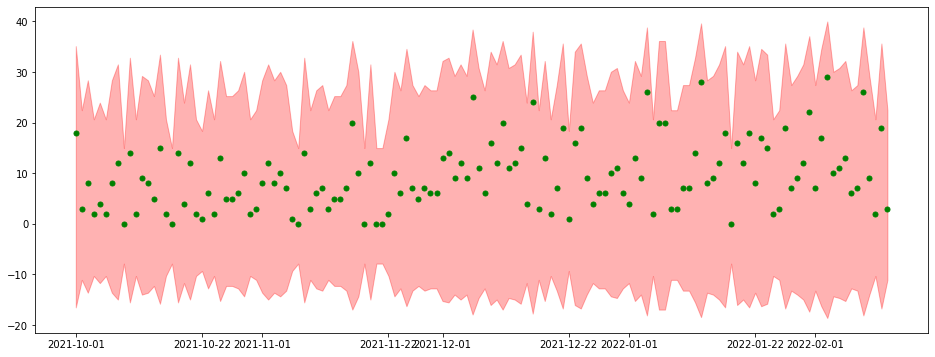

In [47]:
def plot_it(output_pred):
    plt.figure(figsize=(16,6))
    plt.plot(output_pred['Actual'],'go',markersize=5,label='Actual')
    plt.fill_between(
       output_pred.index, output_pred['Lower'], output_pred['Upper'], alpha=0.3, color="red",
       label="Predicted interval")
    plt.show()
    
plot_it(output_pred)

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import luminaire
from luminaire.model.window_density import WindowDensityHyperParams, WindowDensityModel
from luminaire.exploration.data_exploration import DataExploration

In [49]:
day_sales = [7, 20, 26, 7, 32, 26, 18, 11, 22, 28, 10, 7, 14, 12, 53, 15, 12, 25, 11, 11, 17, 13, 11, 24, 13, 21, 12, 8, 23, 15, 11, 25, 20, 8, 13, 38, 31, 28, 36, 49, 60, 91, 24, 12, 12, 18, 21, 16, 13, 19, 17, 36, 18, 17, 21, 15, 24, 21, 18, 12, 21, 13, 25, 15, 13, 16, 19, 13, 15, 25, 20, 13, 17, 9, 14, 8, 27, 10, 13, 22, 25, 10, 26, 17, 20, 11, 10, 11, 12, 12, 23, 26, 12, 20, 12, 8, 14, 5, 18, 21, 13, 17, 12, 29, 22, 10, 17, 19, 12, 22, 4, 19, 10, 13, 14, 24, 25, 13, 16, 8, 14, 22, 18, 20, 21, 22, 19, 20, 16, 17, 26, 10, 23, 12, 18, 30]
data = pd.DataFrame({'index': pd.date_range('2021-10-01', '2022-02-13',freq='D'),'raw': day_sales}) #Each list would be added as a row
data = data.set_index('index')

def predict_daylumina(data):
    op = HyperparameterOptimization(freq='D')
    optimz = op.run(data=data)
    de_optimz = DataExploration(freq='D',change_point_threshold=0.5, **optimz)
    data2, data_pre_prc = de_optimz.profile(data)
    change_point_plot(data, data_pre_prc)
    
    if optimz['LuminaireModel']== 'LADFilteringModel':
        #If Kalman filter for anomally
        day_model_class_name = optimz['LuminaireModel']
        day_module = __import__('luminaire.model', fromlist=[''])
        day_model_class = getattr(day_module, day_model_class_name)


    else:
        #If Structural model for anomally 
        pass

    day_model_object = day_model_class(hyper_params=optimz, freq='D')
    day_success, day_model_date, day_trained_model = day_model_object.train(data=data2, **data_pre_prc)

    print(day_success, day_model_date, day_trained_model)

    output_pred = pd.DataFrame()
    for i in data.index:
        actual = data.loc[i,'raw']
        output = day_trained_model.score(actual, i)
        tmp = pd.DataFrame.from_dict(output[0], orient='index').T
        tmp['Actual'] = actual
        output_pred = output_pred.append(tmp)  

    output_pred['Prediction'] = output_pred['Prediction'].astype(float)
    output_pred['PredStdErr'] = output_pred['PredStdErr'].astype(float)    
    output_pred['Upper'] = output_pred['Prediction'] + 3 * output_pred['PredStdErr'] 
    output_pred['Lower'] = output_pred['Prediction'] - 3 * output_pred['PredStdErr'] 
    output_pred[output_pred['IsAnomaly']==True]
    output_pred.index = data.index
        
    